Gold nano-sphere on substrate
=========================================

<span style="color: red;">**!!Attention!!**:</span> *pyGDM2-retard* is still in beta version and is to be used with caution.

*Example author: Peter Wiecha*  *(retarded propagator by G. Colas des Francs)*


In this example, we calculate the extinction spectra of a gold sphere deposited on a dielectric substrate as well as on a gold film. For comparison, an extinction spectrum of the sphere on a gold substrate can be found in *Patoux et al.* [1].
The script requires the extension package *pyGDM2-retard* (https://pypi.org/project/pyGDM2-retard/).
It can be installed via pip:

<code>pip install -U pyGDM2-retard
</code>


[1]: Patoux et al. *Polarizabilities of complex individual dielectric or plasmonic nanostructures*. **PRB** 101, 235418 (2020). (https://link.aps.org/doi/10.1103/PhysRevB.101.235418)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import linear
from pyGDM2 import tools

## the external package for the retarded Green's Dyads
from pyGDM2_retard import propagators_retarded


setup several simulations
----------------------------------------

In [2]:
## --- structure: gold nano-sphere
step = 12     # for the paper we used a step of 6.67nm
mesh = 'hex'
material = materials.gold()
geo_small = structures.sphere(step, R=25/step, mesh=mesh)
struct_small = structures.struct(step, geo_small, material)
geo_large = structures.sphere(step, R=50/step, mesh=mesh)
struct_large = structures.struct(step, geo_large, material)


## --- incident field: plane wave from top, lin. pol. along X
field_generator = fields.plane_wave
wavelengths = np.linspace(450,700,31)
kwargs = dict(inc_angle=180, E_p=1.0, E_s=0.0)
efield = fields.efield(field_generator, 
                       wavelengths=wavelengths, kwargs=kwargs)


## --- define environments
dyads_glass_quasistatic = propagators.DyadsQuasistatic123(n1=1.5, n2=1.5, n3=1, spacing=0)
dyads_glass_retard = propagators_retarded.DyadsRetard123(n1=1.5, n2=1.5, n3=1, spacing=0)

dyads_goldfilm_quasistatic = propagators.DyadsQuasistatic123(n1=1.5, n2=materials.gold(), n3=1, spacing=50)
dyads_goldfilm_retard = propagators_retarded.DyadsRetard123(n1=1.5, n2=materials.gold(), n3=1, spacing=50)



## --- all configurations to simulate
conf_list = [
    ## small sphere
    dict(
        dyads=dyads_glass_quasistatic,
        struct=struct_small,
        title='R=25nm, on glass - quasistatic'
    ),
    dict(
        dyads=dyads_glass_retard,
        struct=struct_small,
        title='R=25nm, on glass - with retard'
    ),
    dict(
        dyads=dyads_goldfilm_quasistatic,
        struct=struct_small + [0,0,50],   # shift on top of gold film 
        title='R=25nm, gold film - quasistatic'
    ),
    dict(
        dyads=dyads_goldfilm_retard,
        struct=struct_small + [0,0,50],   # shift on top of gold film
        title='R=25nm, gold film - with retard'
    ),
    
    ## large sphere
    dict(
        dyads=dyads_glass_quasistatic,
        struct=struct_large,
        title='R=50nm, on glass - quasistatic'
    ),
    dict(
        dyads=dyads_glass_retard,
        struct=struct_large,
        title='R=50nm, on glass - with retard'
    ),
    dict(
        dyads=dyads_goldfilm_quasistatic,
        struct=struct_large + [0,0,50],   # shift on top of gold film
        title='R=50nm, gold film - quasistatic'
    ),
    dict(
        dyads=dyads_goldfilm_retard,
        struct=struct_large + [0,0,50],   # shift on top of gold film
        title='R=50nm, gold film - with retard'
    )
    ]

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 69/69 dipoles valid
structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 515/515 dipoles valid


run the simulations
----------------------------------


In [3]:
all_spec = []
all_tit = []
for conf in conf_list:
    
    ## --- load config
    all_tit.append(conf['title'])
    struct = conf['struct']
    dyads = conf['dyads']
    
    ## --- create and run the simulation
    sim = core.simulation(struct, efield, dyads)
    sim.scatter()
   
    ## -- extinction spectrum
    wl, spec = tools.calculate_spectrum(sim, 0, linear.extinct)
    ex,sc,ab = spec.T
    all_spec.append(ex)

timing for wl=450.00nm - setup: EE 1543.3ms, inv.: 445.9ms, repropa.: 588.9ms (1 field configs), tot: 2578.4ms
timing for wl=458.33nm - setup: EE 4.4ms, inv.: 1.6ms, repropa.: 1.9ms (1 field configs), tot: 7.9ms
timing for wl=466.67nm - setup: EE 3.8ms, inv.: 1.4ms, repropa.: 1.9ms (1 field configs), tot: 7.2ms
timing for wl=475.00nm - setup: EE 3.7ms, inv.: 1.5ms, repropa.: 1.9ms (1 field configs), tot: 7.1ms
timing for wl=483.33nm - setup: EE 3.7ms, inv.: 1.4ms, repropa.: 1.9ms (1 field configs), tot: 7.0ms
timing for wl=491.67nm - setup: EE 3.7ms, inv.: 1.4ms, repropa.: 1.9ms (1 field configs), tot: 7.1ms
timing for wl=500.00nm - setup: EE 3.7ms, inv.: 1.4ms, repropa.: 1.9ms (1 field configs), tot: 7.0ms
timing for wl=508.33nm - setup: EE 3.6ms, inv.: 1.4ms, repropa.: 1.9ms (1 field configs), tot: 6.9ms
timing for wl=516.67nm - setup: EE 3.5ms, inv.: 1.4ms, repropa.: 1.9ms (1 field configs), tot: 6.8ms
timing for wl=525.00nm - setup: EE 3.4ms, inv.: 1.4ms, repropa.: 1.8ms (1 field c

calculating    803 retarded tensors: 0.22s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=575.00nm - setup: EE 237.9ms, inv.: 1.8ms, repropa.: 2.2ms (1 field configs), tot: 242.0ms
identification of identical tensors: 0.00s
sorting:                             0.00s
indexing of unique tensors:          0.00s
calculating    803 retarded tensors: 0.22s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=583.33nm - setup: EE 234.9ms, inv.: 1.7ms, repropa.: 2.4ms (1 field configs), tot: 239.0ms
identification of identical tensors: 0.00s
sorting:                             0.00s
indexing of unique tensors:          0.00s
calculating    803 retarded tensors: 0.22s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=591.67nm - setup: EE 234.5ms, inv.: 1.8ms, repropa.: 2.2ms (1 field configs), tot: 238.6ms
identification of identical tensors: 0.00s
sorting:                             0.00s
index

identification of identical tensors: 0.00s
sorting:                             0.00s
indexing of unique tensors:          0.00s
calculating    803 retarded tensors: 0.21s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=450.00nm - setup: EE 232.7ms, inv.: 1.9ms, repropa.: 2.3ms (1 field configs), tot: 237.0ms
identification of identical tensors: 0.00s
sorting:                             0.00s
indexing of unique tensors:          0.00s
calculating    803 retarded tensors: 0.21s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=458.33nm - setup: EE 227.1ms, inv.: 1.7ms, repropa.: 2.3ms (1 field configs), tot: 231.2ms
identification of identical tensors: 0.00s
sorting:                             0.00s
indexing of unique tensors:          0.00s
calculating    803 retarded tensors: 0.21s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=466.67nm - setup: EE 227.5ms, inv.: 1.7ms, repropa.: 

calculating    803 retarded tensors: 0.23s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=650.00nm - setup: EE 245.5ms, inv.: 1.7ms, repropa.: 2.2ms (1 field configs), tot: 249.7ms
identification of identical tensors: 0.00s
sorting:                             0.00s
indexing of unique tensors:          0.00s
calculating    803 retarded tensors: 0.24s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=658.33nm - setup: EE 256.4ms, inv.: 1.8ms, repropa.: 2.4ms (1 field configs), tot: 260.7ms
identification of identical tensors: 0.00s
sorting:                             0.00s
indexing of unique tensors:          0.00s
calculating    803 retarded tensors: 0.24s (working on 12 processes)
reconstruction of coupling matrix:   0.00s
timing for wl=666.67nm - setup: EE 260.1ms, inv.: 1.8ms, repropa.: 2.4ms (1 field configs), tot: 264.4ms
identification of identical tensors: 0.00s
sorting:                             0.00s
index

timing for wl=508.33nm - setup: EE 2486.6ms, inv.: 25.0ms, repropa.: 12.4ms (1 field configs), tot: 2524.2ms
identification of identical tensors: 0.03s
sorting:                             0.25s
indexing of unique tensors:          0.05s
calculating  11692 retarded tensors: 1.80s (working on 12 processes)
reconstruction of coupling matrix:   0.02s
timing for wl=516.67nm - setup: EE 2493.5ms, inv.: 25.3ms, repropa.: 12.3ms (1 field configs), tot: 2531.4ms
identification of identical tensors: 0.03s
sorting:                             0.25s
indexing of unique tensors:          0.05s
calculating  11692 retarded tensors: 1.80s (working on 12 processes)
reconstruction of coupling matrix:   0.02s
timing for wl=525.00nm - setup: EE 2497.5ms, inv.: 25.2ms, repropa.: 12.4ms (1 field configs), tot: 2535.4ms
identification of identical tensors: 0.03s
sorting:                             0.25s
indexing of unique tensors:          0.05s
calculating  11692 retarded tensors: 1.80s (working on 12 proc

timing for wl=466.67nm - setup: EE 71.5ms, inv.: 24.9ms, repropa.: 12.5ms (1 field configs), tot: 109.2ms
timing for wl=475.00nm - setup: EE 72.1ms, inv.: 24.8ms, repropa.: 12.5ms (1 field configs), tot: 109.5ms
timing for wl=483.33nm - setup: EE 71.8ms, inv.: 27.1ms, repropa.: 12.5ms (1 field configs), tot: 111.6ms
timing for wl=491.67nm - setup: EE 73.7ms, inv.: 27.4ms, repropa.: 12.4ms (1 field configs), tot: 113.8ms
timing for wl=500.00nm - setup: EE 74.1ms, inv.: 25.1ms, repropa.: 12.4ms (1 field configs), tot: 111.7ms
timing for wl=508.33nm - setup: EE 72.1ms, inv.: 24.8ms, repropa.: 12.4ms (1 field configs), tot: 109.5ms
timing for wl=516.67nm - setup: EE 72.2ms, inv.: 25.0ms, repropa.: 12.5ms (1 field configs), tot: 109.8ms
timing for wl=525.00nm - setup: EE 71.9ms, inv.: 24.9ms, repropa.: 12.4ms (1 field configs), tot: 109.4ms
timing for wl=533.33nm - setup: EE 71.8ms, inv.: 25.1ms, repropa.: 12.8ms (1 field configs), tot: 109.9ms
timing for wl=541.67nm - setup: EE 71.9ms, inv

timing for wl=566.67nm - setup: EE 2748.2ms, inv.: 27.0ms, repropa.: 12.9ms (1 field configs), tot: 2788.2ms
identification of identical tensors: 0.03s
sorting:                             0.26s
indexing of unique tensors:          0.05s
calculating  11365 retarded tensors: 2.08s (working on 12 processes)
reconstruction of coupling matrix:   0.02s
timing for wl=575.00nm - setup: EE 2787.0ms, inv.: 26.9ms, repropa.: 13.3ms (1 field configs), tot: 2827.6ms
identification of identical tensors: 0.03s
sorting:                             0.26s
indexing of unique tensors:          0.05s
calculating  11365 retarded tensors: 2.09s (working on 12 processes)
reconstruction of coupling matrix:   0.02s
timing for wl=583.33nm - setup: EE 2801.5ms, inv.: 27.5ms, repropa.: 12.4ms (1 field configs), tot: 2841.6ms
identification of identical tensors: 0.03s
sorting:                             0.25s
indexing of unique tensors:          0.04s
calculating  11365 retarded tensors: 2.05s (working on 12 proc

plot the spectra
-------------------------------

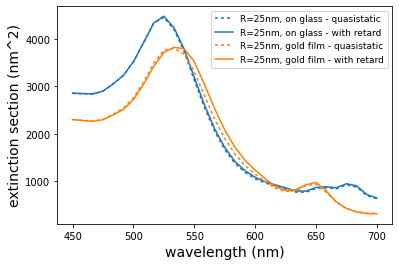

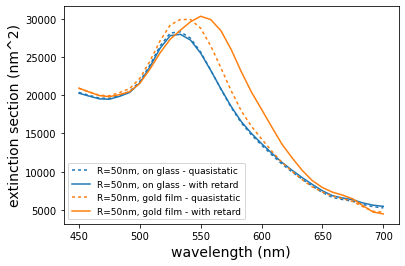

In [4]:
colors = ['C0', 'C0', 'C1', 'C1']
dashes = [[2,2], [], [2,2], []]

## --- plot small sphere results
plt.figure()
for i in range(4):   # small sphere configs
    plt.plot(wl, all_spec[i], label=all_tit[i], color=colors[i], dashes=dashes[i])

plt.legend(fontsize=9)
plt.xlabel('wavelength (nm)', fontsize=14)
plt.ylabel('extinction section (nm^2)', fontsize=14)
plt.show()


## --- plot large sphere results
plt.figure()
for i in range(4, 8):   # large sphere configs
    plt.plot(wl, all_spec[i], label=all_tit[i], color=colors[i%4], dashes=dashes[i%4])

plt.legend(fontsize=9)
plt.xlabel('wavelength (nm)', fontsize=14)
plt.ylabel('extinction section (nm^2)', fontsize=14)
plt.show()
